In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
import seaborn as sb

In [21]:
import import_ipynb
import data

In [22]:
train = data.train
test = data.test

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Assuming the first three columns of your dataset are categorical
train.iloc[:, 0] = label_encoder.fit_transform(train.iloc[:, 0])
train.iloc[:, 1] = label_encoder.fit_transform(train.iloc[:, 1])
train.iloc[:, 2] = label_encoder.fit_transform(train.iloc[:, 2])

test.iloc[:, 0] = label_encoder.fit_transform(test.iloc[:, 0])
test.iloc[:, 1] = label_encoder.fit_transform(test.iloc[:, 1])
test.iloc[:, 2] = label_encoder.fit_transform(test.iloc[:, 2])


In [24]:
# Filling missing values with the mean of each column
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply the scaler to the numerical parts of the data
# Assuming columns from the 4th to the last are the numerical columns
train_numerical = scaler.fit_transform(train.iloc[:, 3:])
test_numerical = scaler.transform(test.iloc[:, 3:])

# Transform these arrays back to DataFrames if necessary
train_numerical = pd.DataFrame(train_numerical, columns=train.columns[3:], index=train.index)
test_numerical = pd.DataFrame(test_numerical, columns=test.columns[3:], index=test.index)


In [26]:
import numpy as np

# Reshape input to be [samples, time steps, features]
X_train = train.iloc[:, :-1].values
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

X_test = test.iloc[:, :-1].values
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Prepare the target variables
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values


In [27]:
from tensorflow.keras.models import Sequential

In [28]:
from tensorflow.keras.layers import LSTM, Dense

In [29]:
# Initialize the RNN
model = Sequential([
    LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [31]:
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
21720/21720 [==============================] - 24s 1ms/step - loss: 0.0014
Epoch 2/25
21720/21720 [==============================] - 22s 997us/step - loss: 9.4722e-04
Epoch 3/25
21720/21720 [==============================] - 21s 982us/step - loss: 9.6217e-04
Epoch 4/25
21720/21720 [==============================] - 23s 1ms/step - loss: 7.5904e-04
Epoch 5/25
21720/21720 [==============================] - 21s 989us/step - loss: 7.4044e-04
Epoch 6/25
21720/21720 [==============================] - 22s 1ms/step - loss: 6.4634e-04
Epoch 7/25
21720/21720 [==============================] - 24s 1ms/step - loss: 5.8484e-04
Epoch 8/25
21720/21720 [==============================] - 22s 1ms/step - loss: 5.4207e-04
Epoch 9/25
21720/21720 [==============================] - 22s 1ms/step - loss: 4.5648e-04
Epoch 10/25
21720/21720 [==============================] - 21s 974us/step - loss: 4.3161e-04
Epoch 11/25
21720/21720 [==============================] - 22s 1ms/step - loss: 3.5778e-04
Epoc

In [32]:
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

predictions = model.predict(X_test)
# Display some predictions
print("Predictions:", predictions.flatten()[:5])
print("Actual values:", y_test[:5])

10698/10698 [==============================] - 6s 553us/step - loss: 3.5768e-05
Test loss: 3.576794915716164e-05
10698/10698 [==============================] - 6s 510us/step
Predictions: [0.20089261 0.20089261 0.20089261 0.20089261 0.20089261]
Actual values: [0.20104021 0.20144029 0.19993999 0.20004001 0.20024005]


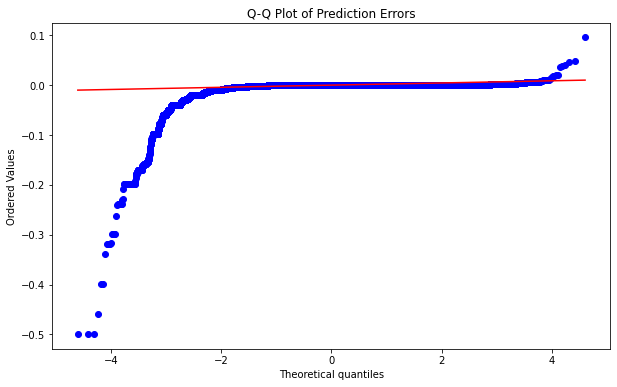

In [50]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(predictions - actual, dist="norm", plot=plt)
plt.title('Q-Q Plot of Prediction Errors')
plt.show()


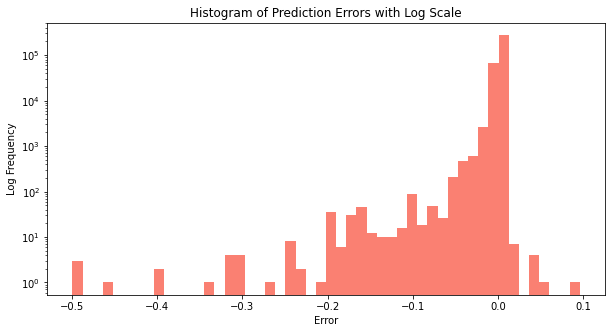

In [46]:
# Calculate errors
errors = predictions - actual

plt.figure(figsize=(10, 5))
plt.hist(errors, bins=50, color='salmon', log=True)
plt.title('Histogram of Prediction Errors with Log Scale')
plt.xlabel('Error')
plt.ylabel('Log Frequency')
plt.show()
